In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
import pandas_profiling
warnings.filterwarnings('ignore')

# Problem Statement

## Create a model for diagnosing Plantar Fasciitis

In [2]:
import os
os.listdir()

['.ipynb_checkpoints',
 'dataset.csv',
 'Plantar Fasciitis _ Kaggle.html',
 'Plantar Fasciitis _ Kaggle_files',
 'Plantar Fasciitis.ipynb']

In [3]:
df = pd.read_csv('dataset.csv')

In [4]:
df.head(8)

,id,age,sex,weight,hoursRunInAWeek,highHealWear,multipleJointPains,allignmentOfMidFoot,diabetes,cyanosis,burningSensationInPS,Tenderness,Status
0,1,21,0,55,7,0,0,0,0,0,0,0,0
1,2,14,0,57,7,0,0,0,0,0,0,1,0
2,3,21,0,51,12,0,0,0,0,0,1,0,0
3,4,23,0,42,8,0,0,0,0,0,1,1,0
4,5,12,0,62,9,0,0,0,0,1,0,0,0
5,6,12,0,50,10,0,0,0,0,1,0,1,0
6,7,10,0,40,6,0,0,0,0,1,1,0,0
7,8,15,0,63,12,0,0,0,0,1,1,1,0


In [8]:
df.shape

(384, 13)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   id                    384 non-null    int64
 1   age                   384 non-null    int64
 2   sex                   384 non-null    int64
 3   weight                384 non-null    int64
 4   hoursRunInAWeek       384 non-null    int64
 5   highHealWear          384 non-null    int64
 6   multipleJointPains    384 non-null    int64
 7   allignmentOfMidFoot   384 non-null    int64
 8   diabetes              384 non-null    int64
 9   cyanosis              384 non-null    int64
 10  burningSensationInPS  384 non-null    int64
 11  Tenderness            384 non-null    int64
 12  Status                384 non-null    int64
dtypes: int64(13)
memory usage: 39.1 KB


In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,384.0,192.500000,110.995495,1.0,96.75,192.5,288.25,384.0
age,384.0,39.723958,14.770900,10.0,27.25,43.5,51.00,60.0
sex,384.0,0.500000,0.500652,0.0,0.00,0.5,1.00,1.0
weight,384.0,62.854167,10.711970,40.0,54.00,63.0,70.00,85.0
hoursRunInAWeek,384.0,2.000000,2.167888,0.0,1.00,2.0,3.00,12.0
highHealWear,384.0,0.500000,0.500652,0.0,0.00,0.5,1.00,1.0
multipleJointPains,384.0,0.500000,0.500652,0.0,0.00,0.5,1.00,1.0
allignmentOfMidFoot,384.0,1.000000,0.817562,0.0,0.00,1.0,2.00,2.0
diabetes,384.0,0.500000,0.500652,0.0,0.00,0.5,1.00,1.0
cyanosis,384.0,0.500000,0.500652,0.0,0.00,0.5,1.00,1.0


## Feature Engineering

### Checking for null values

In [11]:
df.isnull().sum()

id                      0
age                     0
sex                     0
weight                  0
hoursRunInAWeek         0
highHealWear            0
multipleJointPains      0
allignmentOfMidFoot     0
diabetes                0
cyanosis                0
burningSensationInPS    0
Tenderness              0
Status                  0
dtype: int64

#### No null values to handle

### Checking whether the target class is balanced or not

In [9]:
df["Status"].value_counts()

0    279
1    105
Name: Status, dtype: int64

[Text(0, 0, 'Alive'), Text(0, 0, 'Dead')]

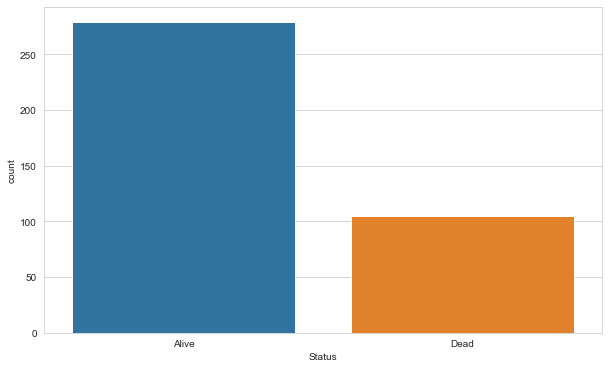

In [10]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
plot=sns.countplot(x="Status",data=df)
plot.set_xticklabels(["Alive","Dead"])

#### Seems to be less balanced, going ahead with Over Sampling Technique

### Over Sampling

In [12]:
columns = df.columns.tolist()
columns

['id',
 'age',
 'sex',
 'weight',
 'hoursRunInAWeek',
 'highHealWear',
 'multipleJointPains',
 'allignmentOfMidFoot',
 'diabetes',
 'cyanosis',
 'burningSensationInPS',
 'Tenderness',
 'Status']

In [13]:
X = df[['id',
 'age',
 'sex',
 'weight',
 'hoursRunInAWeek',
 'highHealWear',
 'multipleJointPains',
 'allignmentOfMidFoot',
 'diabetes',
 'cyanosis',
 'burningSensationInPS',
 'Tenderness',]]
Y = df['Status']

In [14]:
print(X.shape)
print(Y.shape)

(384, 12)
(384,)


In [15]:
## RandomOverSampler to handle imbalanced data
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [16]:
os =RandomOverSampler(sampling_strategy=0.5)

In [17]:
X_train_res, y_train_res = os.fit_resample(X, Y)

In [18]:
X_train_res.shape,y_train_res.shape

((418, 12), (418,))

In [19]:
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_train_res)))

Original dataset shape Counter({0: 279, 1: 105})
Resampled dataset shape Counter({0: 279, 1: 139})


In [20]:
df=X_train_res
df['Status']=y_train_res

[Text(0, 0, 'Alive'), Text(0, 0, 'Dead')]

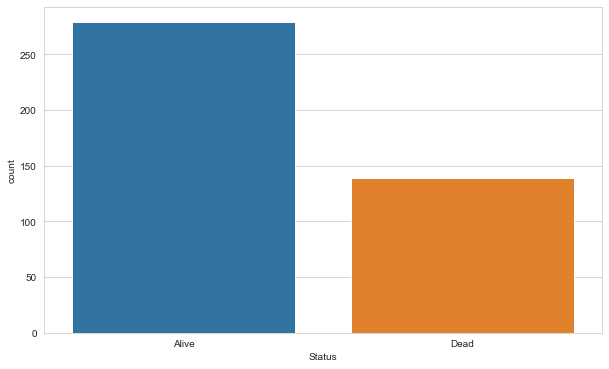

In [21]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
plot=sns.countplot(x="Status",data=df)
plot.set_xticklabels(["Alive","Dead"])

In [22]:
df.head()

,id,age,sex,weight,hoursRunInAWeek,highHealWear,multipleJointPains,allignmentOfMidFoot,diabetes,cyanosis,burningSensationInPS,Tenderness,Status
0,1,21,0,55,7,0,0,0,0,0,0,0,0
1,2,14,0,57,7,0,0,0,0,0,0,1,0
2,3,21,0,51,12,0,0,0,0,0,1,0,0
3,4,23,0,42,8,0,0,0,0,0,1,1,0
4,5,12,0,62,9,0,0,0,0,1,0,0,0


## Performing EDA using Panda Profiling

In [21]:
prof_report = pandas_profiling.ProfileReport(df , title = 'Plantar Fasciitis Prediction')
prof_report.to_widgets()

## Feature Selection

#### Using Heatmap

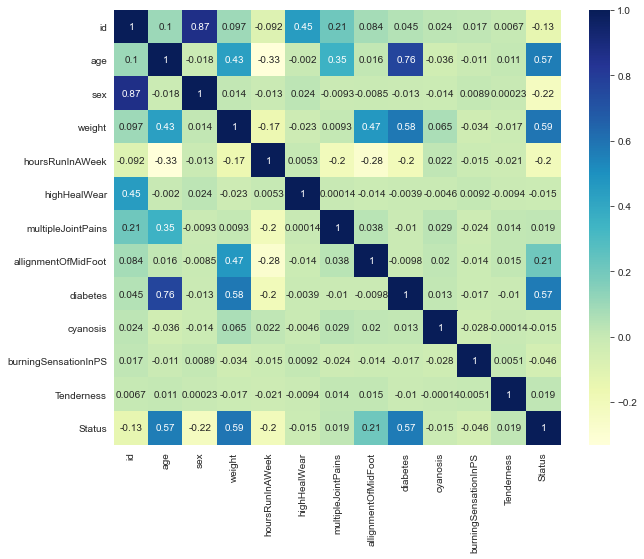

In [25]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

#### Using Filter method ( X-Square technique) on the attributes

In [26]:
df.columns

Index(['id', 'age', 'sex', 'weight', 'hoursRunInAWeek', 'highHealWear',
       'multipleJointPains', 'allignmentOfMidFoot', 'diabetes', 'cyanosis',
       'burningSensationInPS', 'Tenderness', 'Status'],
      dtype='object')

In [23]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = df[['sex','hoursRunInAWeek', 'highHealWear',
       'multipleJointPains', 'allignmentOfMidFoot', 'diabetes', 'cyanosis',
       'burningSensationInPS', 'Tenderness']]  #independent columns
y = df['Status']    #target column

In [24]:
#apply SelectKBest class to extract top 5 best features
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,y)

In [25]:
dfscores = pd.DataFrame(fit.scores_)
dfpvalues=pd.DataFrame(fit.pvalues_)
dfcolumns = pd.DataFrame(X.columns)

In [26]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores,dfpvalues],axis=1)
featureScores.columns = ['Specs','Score',"P-Values"]  #naming the dataframe columns

In [27]:
featureScores

,Specs,Score,P-Values
0,sex,10.531788,1.173387e-03
1,hoursRunInAWeek,41.322305,1.290874e-10
2,highHealWear,0.005389,9.414787e-01
3,multipleJointPains,0.005389,9.414787e-01
4,allignmentOfMidFoot,13.020346,3.081249e-04
5,diabetes,69.035449,9.670945e-17
6,cyanosis,0.508796,4.756607e-01
7,burningSensationInPS,0.014885,9.028957e-01
8,Tenderness,0.133079,7.152611e-01


In [28]:
x=df[["age","weight",'sex','hoursRunInAWeek','allignmentOfMidFoot', 'diabetes']]

In [29]:
y=df["Status"]

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state =101)

In [42]:
standardScaler = StandardScaler()

x_train[["age","weight",'hoursRunInAWeek']] = standardScaler.fit_transform(x_train[["age","weight",'hoursRunInAWeek']])

x_test[["age","weight",'hoursRunInAWeek']]= standardScaler.transform(x_test[["age","weight",'hoursRunInAWeek']])

#Saving the scaler to disk
import pickle
pickle.dump(standardScaler, open('PlantarFascitisScaler.pkl', 'wb'))



## FINAL MODEL SELECTED- SVM MODEL

In [33]:
from sklearn.svm import SVC
model = SVC()

In [34]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=101,test_size=0.7)

In [35]:
X_train.shape

(125, 6)

In [36]:
X_test.shape

(293, 6)

In [37]:
model=SVC(C=1000,gamma=0.0001,kernel="rbf")
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[188   9]
 [  9  87]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       197
           1       0.91      0.91      0.91        96

    accuracy                           0.94       293
   macro avg       0.93      0.93      0.93       293
weighted avg       0.94      0.94      0.94       293



In [38]:
import pickle
pickle.dump(model, open('PlantarFascitisAcc94r91.pkl','wb'))